In [46]:
import pandas as pd;
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt;

file_data = pd.read_csv('data.csv')
file_data.info()
file_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [47]:
file_data = file_data.drop(["id"], axis=1)
file_data = file_data.drop(["Unnamed: 32"], axis=1)
file_data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
file_data.shape

(569, 31)

In [49]:
file_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


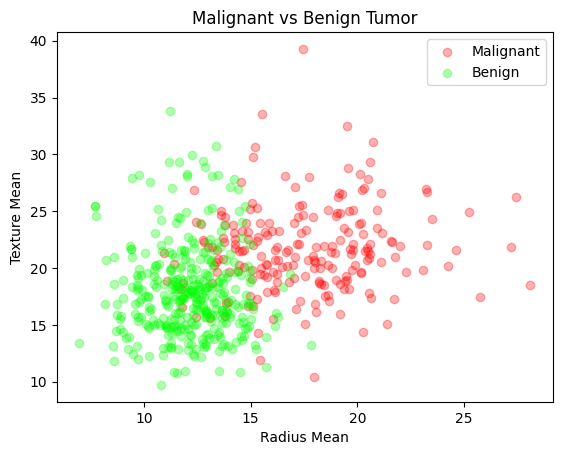

In [50]:
M = file_data[file_data.diagnosis == "M"]
B = file_data[file_data.diagnosis == "B"]

plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

In [51]:
file_data.diagnosis = [1 if i == "M" else 0 for i in file_data.diagnosis]
file_data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


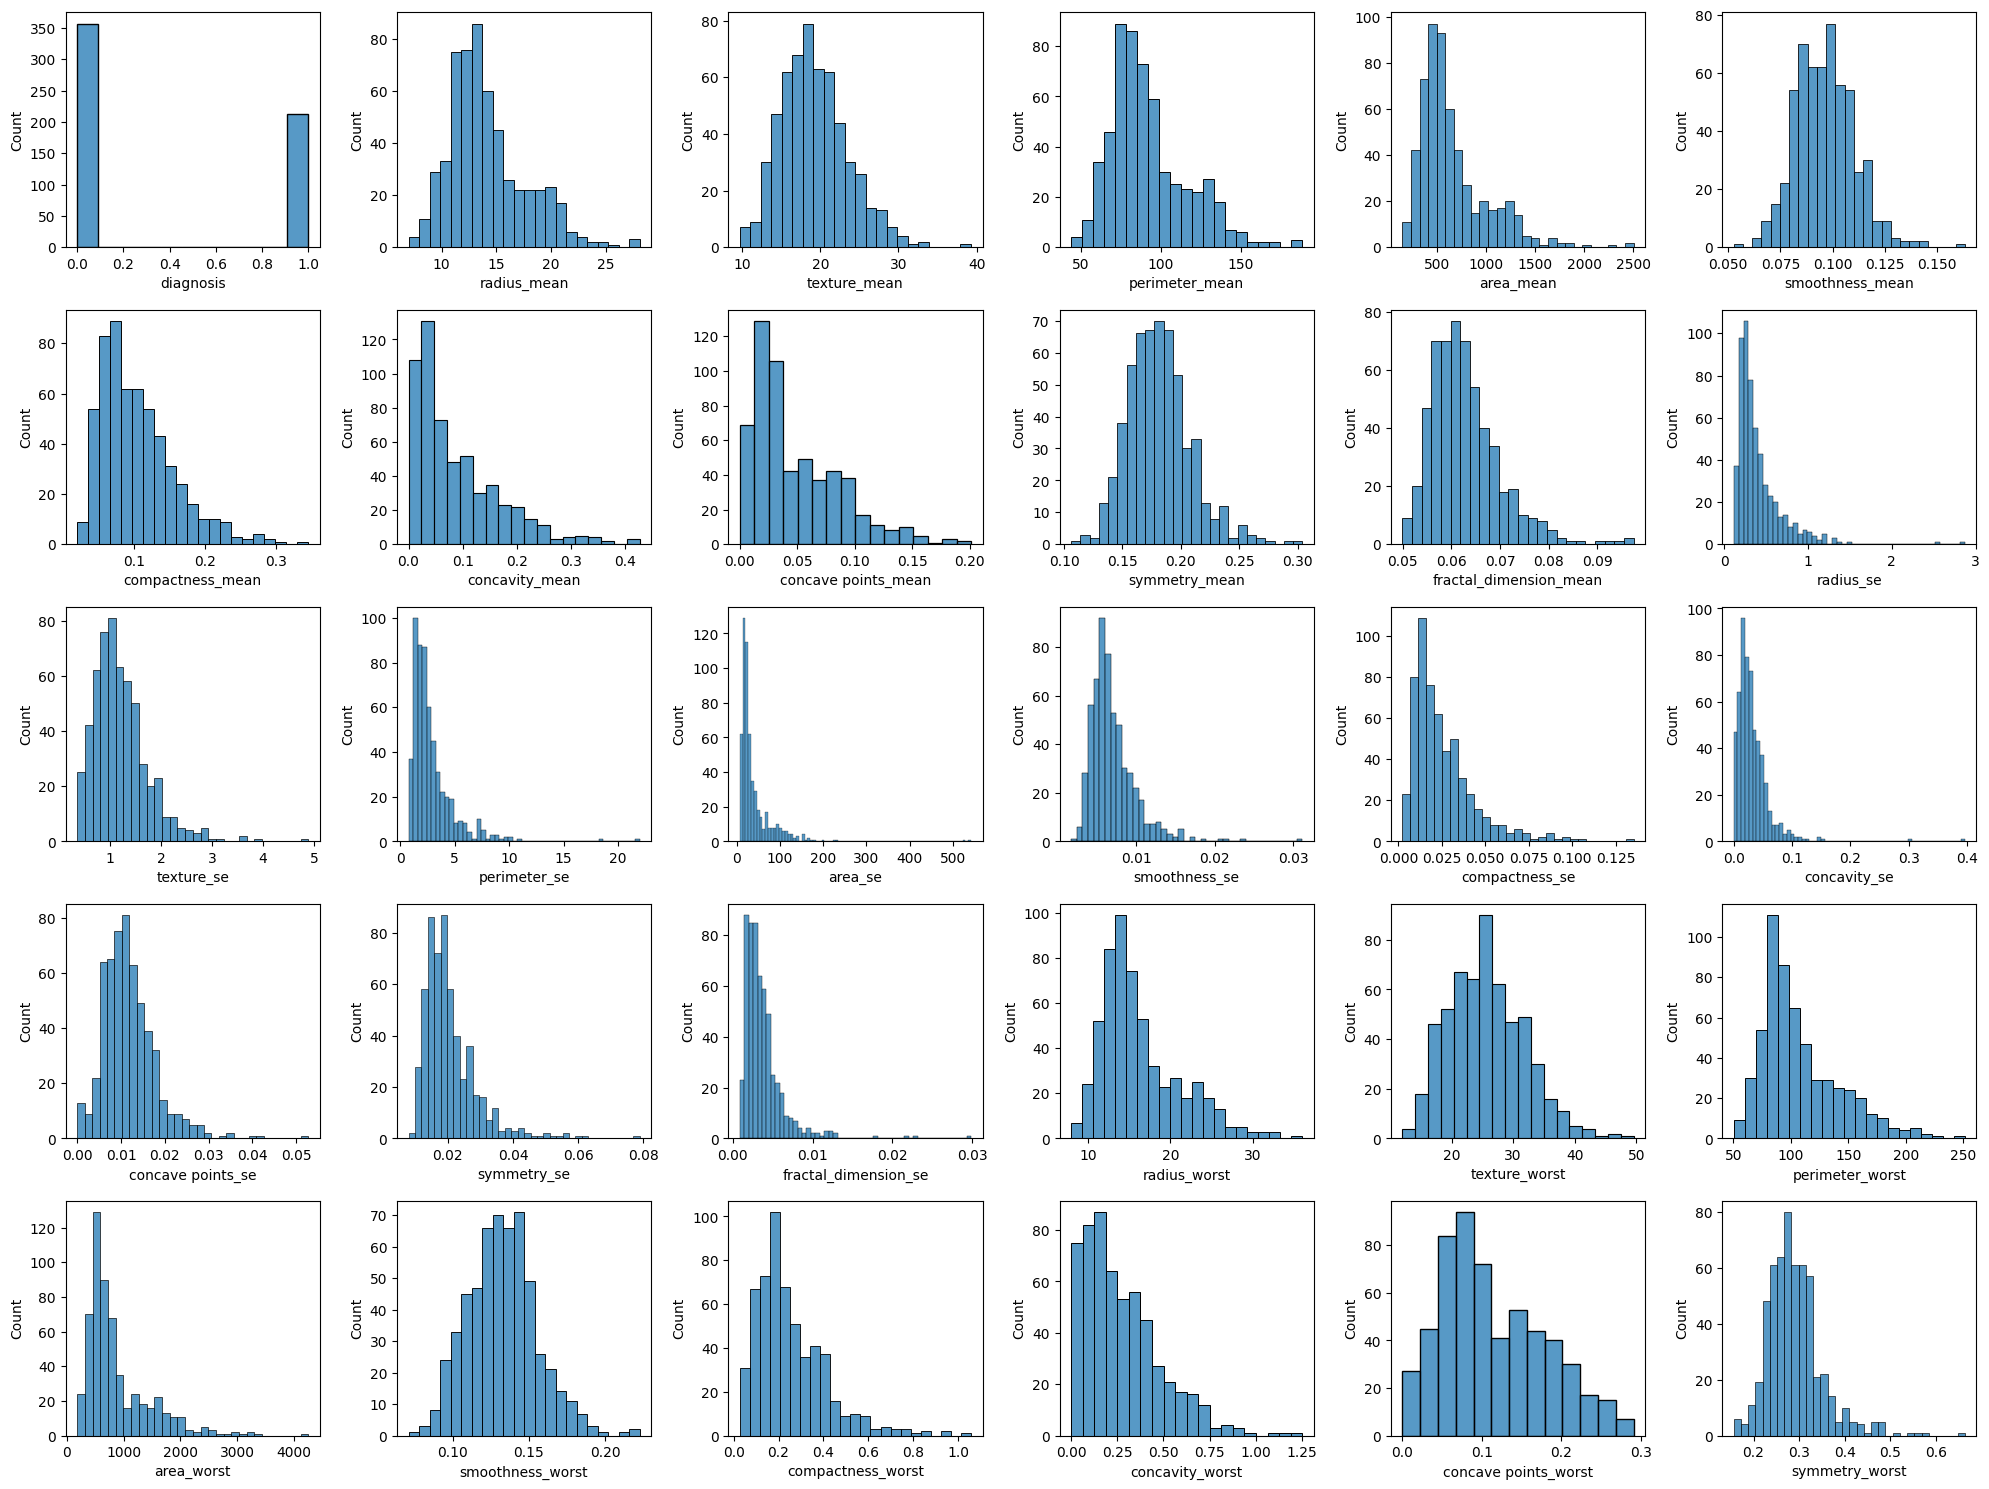

In [88]:
import seaborn as sns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in file_data:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(file_data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [93]:
mean_features = list(file_data.columns[1:11])
se_features = list(file_data.columns[11:21])
worst_features = list(file_data.columns[21:31])

mean_features.append('diagnosis')
se_features.append('diagnosis')
worst_features.append('diagnosis')

corr_mean_features = file_data[mean_features].corr()
corr_se_features = file_data[se_features].corr()
corr_worst_features = file_data[worst_features].corr()

In [95]:
corr_mean_features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,-0.012838


In [96]:
corr_se_features

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,diagnosis
radius_se,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.567134
texture_se,0.213247,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.008303
perimeter_se,0.972794,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143,0.556141
area_se,0.951830,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071,0.548236
smoothness_se,0.164514,0.397243,0.151075,0.075150,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,-0.067016
compactness_se,0.356065,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269,0.292999
concavity_se,0.332358,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372,0.253730
concave points_se,0.513346,0.230283,0.556264,0.415730,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044,0.408042
symmetry_se,0.240567,0.411621,0.266487,0.134109,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078,-0.006522
fractal_dimension_se,0.227754,0.279723,0.244143,0.127071,0.427374,0.803269,0.727372,0.611044,0.369078,1.000000,0.077972


In [97]:
corr_worst_features

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_worst,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,0.776454
texture_worst,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,0.456903
perimeter_worst,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,0.782914
area_worst,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,0.733825
smoothness_worst,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,0.421465
compactness_worst,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,0.590998
concavity_worst,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,0.659610
concave points_worst,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,0.793566
symmetry_worst,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,0.416294
fractal_dimension_worst,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,0.323872


In [98]:
# selecting features with more than 0.40

features_40 = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 
               'radius_se', 'perimeter_se', 'area_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
               'smoothness_worst', 'compactness_worst',  'concavity_worst', 'concave points_worst', 'symmetry_worst']

features_60 = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
               'concavity_worst', 'concave points_worst']



x = file_data.drop(["diagnosis"], axis = 1)
y = file_data.diagnosis.values

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 33)
train_x_features = x_train[features_40]
test_x_features = x_test[features_40]
print("Train dataset shape: ", train_x_features.shape )
print("Test dataset shape: ", test_x_features.shape )


Train dataset shape:  (398, 20)
Test dataset shape:  (171, 20)


In [120]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=123)
dt.fit(train_x_features, y_train)
dt.score(test_x_features, y_test)

0.9532163742690059

[Text(0.5277777777777778, 0.9285714285714286, 'x[13] <= 106.2\nentropy = 0.948\nsamples = 398\nvalue = [252, 146]'),
 Text(0.2777777777777778, 0.7857142857142857, 'x[18] <= 0.135\nentropy = 0.262\nsamples = 248\nvalue = [237, 11]'),
 Text(0.1111111111111111, 0.6428571428571429, 'x[12] <= 30.145\nentropy = 0.073\nsamples = 227\nvalue = [225, 2]'),
 Text(0.05555555555555555, 0.5, 'entropy = 0.0\nsamples = 196\nvalue = [196, 0]'),
 Text(0.16666666666666666, 0.5, 'x[18] <= 0.092\nentropy = 0.345\nsamples = 31\nvalue = [29, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.2222222222222222, 0.35714285714285715, 'x[4] <= 0.068\nentropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(0.16666666666666666, 0.21428571428571427, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2777777777777778, 0.21428571428571427, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.4444444444444444, 0.6428571428571429, 'x[12] <= 25.94\nentropy = 

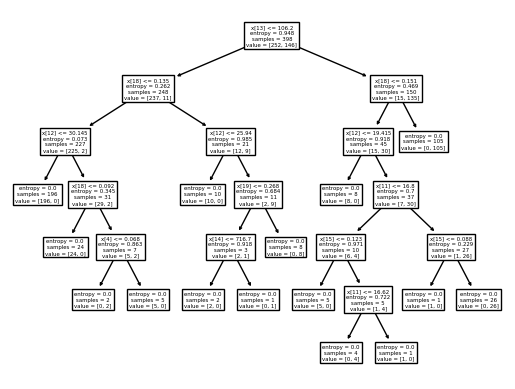

In [121]:
from sklearn import tree

tree.plot_tree(dt)

In [122]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_x_features, y_train)
knn.score(test_x_features, y_test)

0.9239766081871345

In [123]:
knn_a = KNeighborsClassifier(n_neighbors = 3)
knn_a.fit(train_x_features, y_train)
knn_a.score(test_x_features, y_test)

0.9005847953216374

In [124]:
knn_b = KNeighborsClassifier(n_neighbors = 1)
knn_b.fit(train_x_features, y_train)
knn_b.score(test_x_features, y_test)

0.8947368421052632

In [125]:
knn_c = KNeighborsClassifier(n_neighbors = 7)
knn_c.fit(train_x_features, y_train)
knn_c.score(test_x_features, y_test)

0.9181286549707602

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(loss = 'log_loss')
gbc.fit(train_x_features, y_train)
gbc.score(test_x_features, y_test)

0.9532163742690059

In [127]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier(loss='log_loss')
hgbc.fit(train_x_features, y_train)
hgbc.score(test_x_features, y_test)


0.9590643274853801

In [137]:
from sklearn.neural_network import MLPClassifier

nnmlp = MLPClassifier(hidden_layer_sizes=(20,), solver='lbfgs', random_state=1, activation='logistic')
nnmlp.fit(train_x_features, y_train)
nnmlp.score(test_x_features, y_test)

c:\Users\Junior Quintana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9707602339181286

In [138]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(train_x_features, y_train)
svm.score(test_x_features, y_test)

0.9766081871345029

In [149]:
svm_a = SVC(kernel='poly')
svm_a.fit(train_x_features, y_train)
svm_a.score(test_x_features, y_test)

0.8888888888888888